In [49]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


%matplotlib inline





In [24]:
dataset='https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=database.sqlite'

In [25]:
od.download(dataset)

  0%|          | 0.00/2.55M [00:00<?, ?B/s]

100%|██████████| 2.55M/2.55M [00:01<00:00, 1.62MB/s]

In [6]:
import os

In [27]:
data_dir = '.\\twitter-airline-sentiment'

In [28]:
os.listdir(data_dir)

['database.sqlite', 'Tweets.csv']

In [40]:
data = pd.read_csv('.\Tweets.csv')

In [41]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [42]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [43]:
data.shape

(14640, 15)

In [45]:
# count the length of each col /data
(len(data)-data.count())/len(data)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [46]:
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']

In [47]:
Mood_count=data['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Moods')

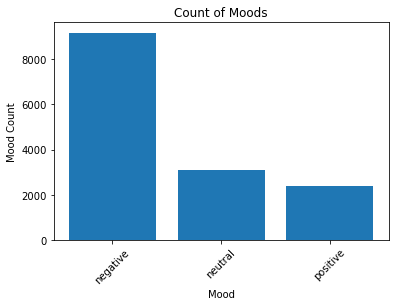

In [51]:
#plot the negative-neutral-positive tweets

index = [1,2,3]
plt.bar(index,Mood_count)
plt.xticks(index, ['negative','neutral','positive'], rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [53]:
data['airline'].value_counts()

#count of tweets/airline

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

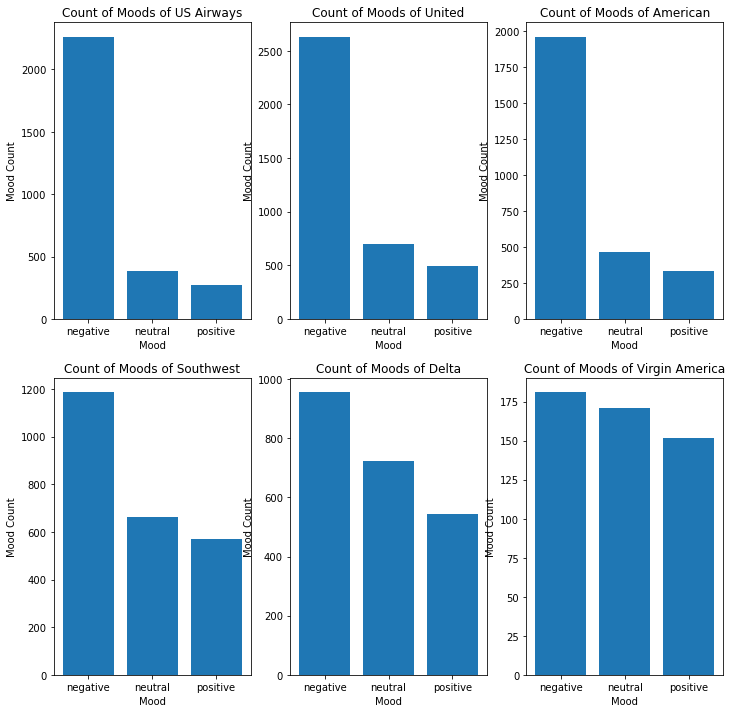

In [54]:
# plot the sentiment for each airline

def plot_sub_sentiment(Airline):
    df=data[data['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')



#mostly negative tweets skewed for first three airlines. more evenly distributed for the next three

In [55]:
NR_Count=dict(data['negativereason'].value_counts(sort=False))

In [59]:
#create function to count reasons for negative flights

def NR_Count(Airline):
    if Airline=='All':
        df=data
    else:
        df=data[data['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [60]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

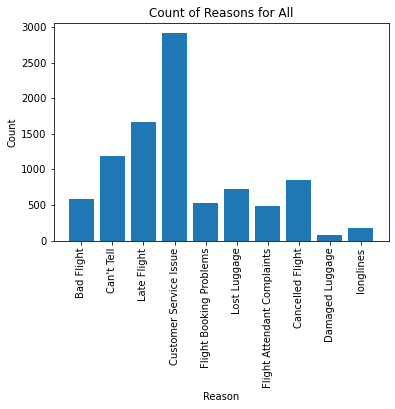

In [61]:
plot_reason('All')

#plot the reasons for negative tweets
#customer service and late flight leading to most negative tweets

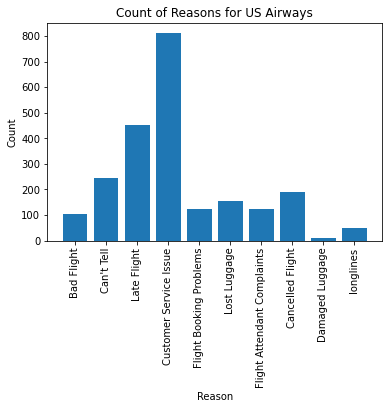

In [66]:
plot_reason('US Airways')

#plot the reasons for each airline

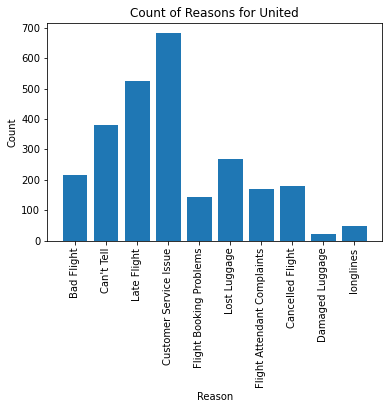

In [67]:
plot_reason('United')

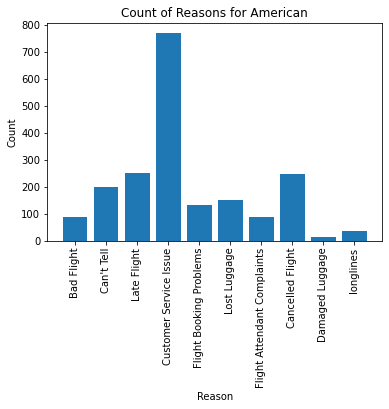

In [68]:
plot_reason('American')

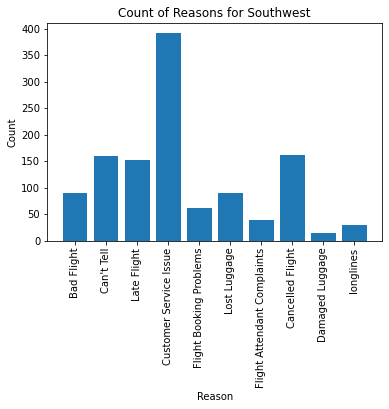

In [69]:
plot_reason('Southwest')

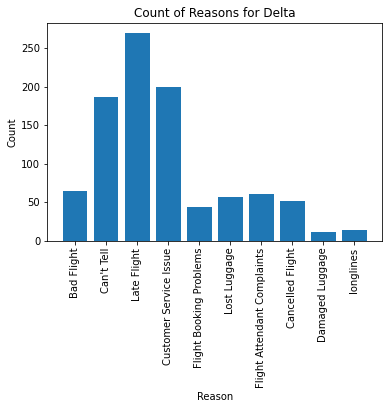

In [70]:
plot_reason('Delta')

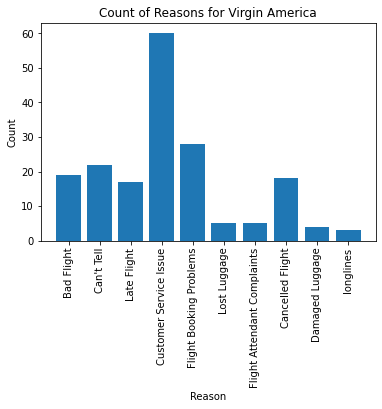

In [71]:
plot_reason('Virgin America')